In [6]:
import pandas as pd

input='/home/isacco.cenacchi/data/Tirocinio/out/tools_comparison.tsv'

df=pd.read_csv(input, sep='\t')


# Calcolo delle lunghezze delle spacers e dei repeat
df['SP_lens'] = df['Spacers'].apply(lambda x: [len(spacer) for spacer in x.split(',')])
df['DR_lens'] = df['Repeats'].apply(lambda x: [len(dr) for dr in x.split(',')])
# Calcolo delle mediane
df['median_DR_len'] = df['DR_lens'].apply(lambda x: pd.Series(x).median())
df['median_SP_len'] = df['SP_lens'].apply(lambda x: pd.Series(x).median())

# Funzione per calcolare il coefficiente di variazione
def coeff_var(x):
    return pd.Series(x).std() / pd.Series(x).mean()

# Deviazione standard
df['std_DR_len'] = df['DR_lens'].apply(lambda x: pd.Series(x).std())
df['std_SP_len'] = df['SP_lens'].apply(lambda x: pd.Series(x).std())

# Coefficiente di variazione
df['cv_DR_len'] = df['DR_lens'].apply(coeff_var)
df['cv_SP_len'] = df['SP_lens'].apply(coeff_var)

# Rapporto tra la lunghezza minima e massima
df['minmax_DR_ratio'] = df['DR_lens'].apply(lambda x: min(x) / max(x) if max(x) != 0 else 0)



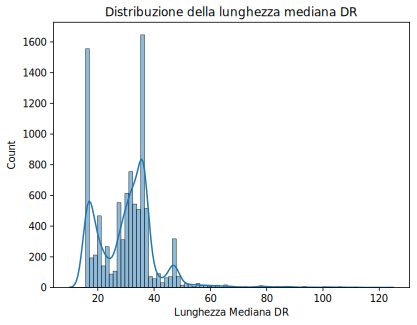

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['figure.dpi']= 300

import seaborn as sns
# import matplotlib.pyplot as plt

# Visualizzazione delle mediane DR
sns.histplot(df['median_DR_len'], kde=True)
plt.title('Distribuzione della lunghezza mediana DR')
plt.xlabel('Lunghezza Mediana DR')
plt.show()

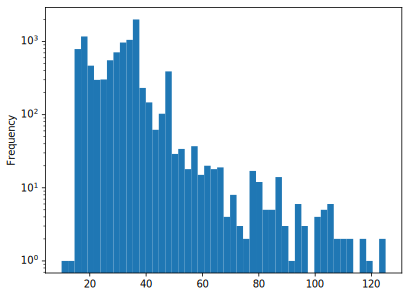

In [15]:

ax = df['median_DR_len'].plot(kind='hist', bins=50)
ax.set_yscale('log')
plt.show()

In [22]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

seq1 = "AGCTAGC"
seq2 = "AGCTGAC"

alignments = pairwise2.align.globalxx(seq1, seq2)
for alignment in alignments:
    print(format_alignment(*alignment))

AGCTAG-C
|||| | |
AGCT-GAC
  Score=6

AGCT-AGC
|||| | |
AGCTGA-C
  Score=6



In [19]:
from Bio.Align import PairwiseAligner
import numpy as np

# Inizializza l'allineatore
aligner = PairwiseAligner()

sequences = ["AGCTAGC", "AGCTGAC", "AGCTA", "AGCTAGG"]

# Inizializza la matrice di similarità
similarity_matrix = np.zeros((len(sequences), len(sequences)))

for i in range(len(sequences)):
    for j in range(i, len(sequences)):
        # Calcola il punteggio di allineamento
        score = aligner.score(sequences[i], sequences[j])
        similarity_matrix[i][j] = score
        similarity_matrix[j][i] = score  # La matrice è simmetrica

print(similarity_matrix)

[[7. 6. 5. 6.]
 [6. 7. 5. 5.]
 [5. 5. 5. 5.]
 [6. 5. 5. 7.]]


In [20]:
from collections import Counter

sequences = ["AGCTAGC", "AGCTGAC", "AGCTA", "AGCTAGC"]
counter = Counter(sequences)
most_common_sequence, count = counter.most_common(1)[0]

print(f"La sequenza più comune è: {most_common_sequence} con {count} occorrenze.")


La sequenza più comune è: AGCTAGC con 2 occorrenze.
